In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib import pyplot as plt
from yellowbrick.model_selection import FeatureImportances
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import learning_curve, LearningCurveDisplay, ShuffleSplit
import math
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC

In [ ]:
poses = pd.read_csv('POSes.csv')

In [ ]:
poses = pd.read_csv('POSes for graph.csv').drop(columns = ['frequency (log)', 'position of gap'])

In [ ]:
poses = pd.read_csv('POSes_pentagram_analysis.csv')
poses = poses[poses['left_empty'] == 0]

In [ ]:
poses

,id,text,number_in_text,number_of_gaps,word,lemma,pos,correct_guess,number_of_participants,predictability_type,...,penta_count,penta_gap_count,tri_1_count,tri_1_gap_count,left_new,left_new_gap,tri_2_count,tri_2_gap_count,tri_3_count,tri_3_gap_count
1,2,1,2,43,ступеням,ступень,n,9,47,global,...,10.0,24.0,926.0,2183.0,926.0,2183.0,305.0,859.0,1281.0,4618.0
2,3,1,3,43,шашек,шашка,n,5,47,global,...,234.0,253.0,7132.0,8787.0,7132.0,8787.0,4275.0,5303.0,3686.0,10278.0
3,4,1,4,43,спиною,спина,n,38,47,local,...,27.0,44.0,725.0,1507.0,725.0,1507.0,2488.0,3611.0,7721.0,18094.0
4,5,1,5,43,финики,финик,n,4,47,global,...,4.0,37.0,4812.0,24666.0,4812.0,24666.0,257.0,1340.0,242.0,1003.0
5,6,1,6,43,чудо,чудо,n,26,47,global,...,4.0,40.0,882.0,6495.0,882.0,6495.0,257.0,1340.0,457.0,1719.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,6,31,35,заговорил,заговорить,v,15,47,local,...,4.0,5.0,509.0,1364.0,509.0,1364.0,475.0,4166.0,254.0,1836.0
230,231,6,32,35,присутствовал,присутствовать,v,34,47,local,...,16.0,19.0,926.0,2173.0,926.0,2173.0,1257.0,2286.0,772.0,2908.0
231,232,6,33,35,балконе,балкон,n,15,47,global,...,0.0,0.0,552.0,1405.0,552.0,1405.0,147.0,314.0,47.0,224.0
232,233,6,34,35,тайно,тайно,adv,15,47,global,...,2.0,18.0,139.0,1248.0,139.0,1248.0,81.0,2905.0,90.0,4774.0


In [ ]:
poses.insert(0, 'correct_guesses_prop', poses['correct_guess'] / poses['number_of_participants'])
poses.insert(0, 'correct_pos_prop', poses['correct_pos'] / poses['number_of_participants'])
poses.insert(0, 'correct_sem_prop', poses['correct_sem'] / poses['number_of_participants'])
poses.insert(0, 'frequency_log', poses['frequency'].apply(lambda x: np.log2(x + 1)))
poses.insert(0, 'number_prop', poses['number_in_text'] / poses['number_of_gaps'])
poses.insert(0, 'bigram_log', poses['sum_bigram'].apply(lambda x: np.log2(x + 1)))
poses.insert(0, 'len_word', poses['word'].apply(lambda x: 1/len(x)))

In [ ]:
poses.insert(0, 'correct_pos_prop', poses['correct_pos'] / poses['number_of_participants'])
poses.insert(0, 'left', poses['left_new'] / poses['left_new_gap'])
poses.insert(0, 'bigram_log', poses['sum_bigram'].apply(lambda x: np.log2(x + 1)))

In [ ]:
poses.insert(0, 'correct_guesses_prop', poses['correct_guess'] / poses['number_of_participants'])
poses.insert(0, 'frequency (log)', poses['frequency'].apply(lambda x: np.log2(x + 1)))
poses.insert(0, 'position of gap', poses['number_in_text'] / poses['number_of_gaps'])

In [ ]:
poses = poses.drop(columns = ['id', 'text', 'number_of_gaps', 'word',
            'lemma', 'number_of_participants', 'frequency',
            'word_before', 'word_after', 'correct_guess',
            'skipped', 'number_in_text', 'count_dependents', 'is_middle',
            'semantics', 'dependency', 'pos_before', 'pos_after', 'head',
            'left_bigram', 'right_bigram', 'max_bigram', 'sum_bigram',
            'token_frequency', 'left_frequency', 'right_frequency',
            'correct_pos', 'correct_sem'])

KeyError: "['word_before', 'word_after', 'skipped', 'count_dependents', 'is_middle', 'semantics', 'dependency', 'pos_before', 'pos_after', 'head', 'left_bigram', 'right_bigram', 'max_bigram', 'sum_bigram', 'token_frequency', 'left_frequency', 'right_frequency', 'correct_pos', 'correct_sem'] not found in axis"

In [ ]:
poses = poses.drop(columns = ['id', 'text', 'number_of_gaps', 'word',
            'lemma', 'number_of_participants', 'frequency', 'correct_guess', 'number_in_text'])

In [ ]:
poses = poses.drop(columns = ['id', 'text', 'number_in_text', 'number_of_gaps',
                              'word', 'lemma', 'number_of_participants',
                              'dependency', 'head', 'correct_guess', 'correct_pos',
                              'with_empty', 'left_empty', 'pentagram', 'sum_bigram',
                              'pentagram_poses', 'penta_count', 'penta_gap_count',
                              'tri_1_count', 'tri_1_gap_count', 'left_new', 'left_new_gap',
                              'tri_2_count', 'tri_2_gap_count', 'tri_3_count', 'tri_3_gap_count'])

In [ ]:
poses

,bigram_log,left,correct_pos_prop,pos,predictability_type,count_dependents_new,is_middle_new
1,5.954196,0.424187,0.936170,n,global,1,1
2,1.584963,0.811654,0.936170,n,global,2,1
3,9.434628,0.481088,0.957447,n,local,2,1
4,1.584963,0.195086,0.404255,n,global,1,1
5,8.204571,0.135797,0.744681,n,global,1,1
...,...,...,...,...,...,...,...
229,10.441907,0.373167,0.936170,v,local,3,1
230,9.509775,0.426139,0.872340,v,local,4,1
231,11.365229,0.392883,0.851064,n,global,1,1
232,4.807355,0.111378,0.723404,adv,global,2,1


In [ ]:
num_columns = poses.select_dtypes(np.number).columns.tolist()
char_columns = poses.select_dtypes('object').columns.tolist()
print('Числовые: ', num_columns, '\nКатегориальные: ', char_columns)

Числовые:  ['bigram_log', 'left', 'correct_pos_prop', 'count_dependents_new', 'is_middle_new'] 
Категориальные:  ['pos', 'predictability_type']


In [ ]:
encoder = OneHotEncoder(sparse_output=False)
one_hot_encoded = encoder.fit_transform(poses[char_columns])
one_hot_df = pd.DataFrame(one_hot_encoded,
                          columns=encoder.get_feature_names_out(char_columns))
poses_encoded = pd.concat([poses.drop(char_columns, axis=1), one_hot_df], axis=1)
poses_encoded.head(2)

,bigram_log,left,correct_pos_prop,count_dependents_new,is_middle_new,pos_adj,pos_adv,pos_n,pos_v,predictability_type_-,predictability_type_global,predictability_type_local
1,5.954196,0.424187,0.93617,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.584963,0.811654,0.93617,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [ ]:
poses_encoded = poses_encoded.fillna(0)

MAE:  0.16856207459296524 
MSE:  0.044734357082216014


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


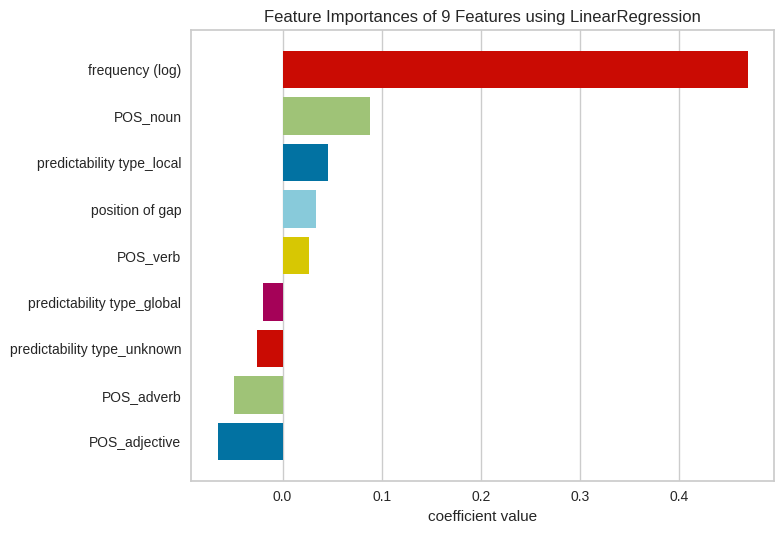

<Axes: title={'center': 'Feature Importances of 9 Features using LinearRegression'}, xlabel='coefficient value'>

In [ ]:
reg = LinearRegression()  # объект модели линейной регрессии

y = poses_encoded['correct_guesses_prop'] # целевая переменная
X = poses_encoded.drop(columns = ['correct_guesses_prop', 'correct_pos_prop', 'correct_sem_prop']) # матрица всех признаков

# использзуем стандартизатор
sc = MinMaxScaler()

pandas_columns = X.columns
X = sc.fit_transform(X)

X = pd.DataFrame(X, columns=pandas_columns)

# наконец, делаем .fit()
reg.fit(X, y)

# добавим к датафрейму столбец prediction
X['prediction'] = reg.predict(X)

# метрики
mae = mean_absolute_error(y, X['prediction'])
mse = mean_squared_error(y, X['prediction'])

print('MAE: ', mae, '\nMSE: ', mse)

viz = FeatureImportances(reg, relative=False)
viz.fit(X, y)
viz.show()

MAE:  0.13275370621094343 
MSE:  0.03226029120317106


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


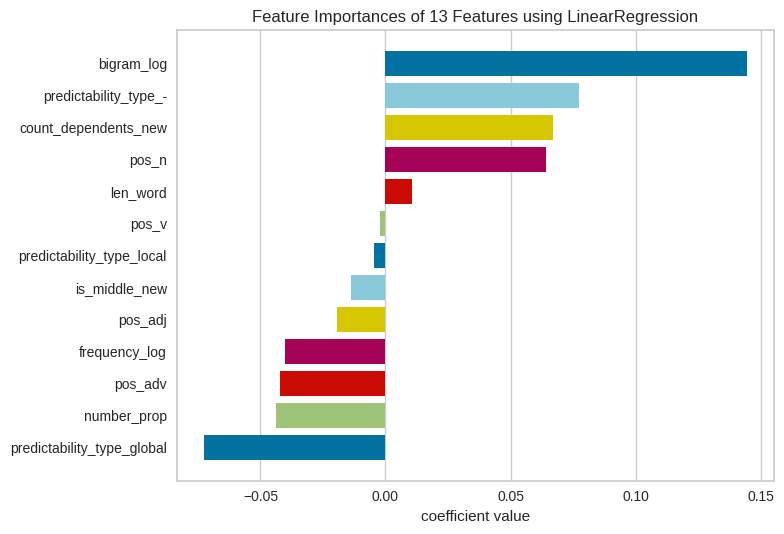

<Axes: title={'center': 'Feature Importances of 13 Features using LinearRegression'}, xlabel='coefficient value'>

In [ ]:
reg = LinearRegression()  # объект модели линейной регрессии

y = poses_encoded['correct_pos_prop'] # целевая переменная
X = poses_encoded.drop(columns = ['correct_guesses_prop', 'correct_pos_prop', 'correct_sem_prop']) # матрица всех признаков

# использзуем стандартизатор
sc = MinMaxScaler()

pandas_columns = X.columns
X = sc.fit_transform(X)

X = pd.DataFrame(X, columns=pandas_columns)

# наконец, делаем .fit()
reg.fit(X, y)

# добавим к датафрейму столбец prediction
X['prediction'] = reg.predict(X)

# метрики
mae = mean_absolute_error(y, X['prediction'])
mse = mean_squared_error(y, X['prediction'])

print('MAE: ', mae, '\nMSE: ', mse)

viz = FeatureImportances(reg, relative=False)
viz.fit(X, y)
viz.show()

MAE:  0.22647714164349247 
MSE:  0.06804332828862013


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


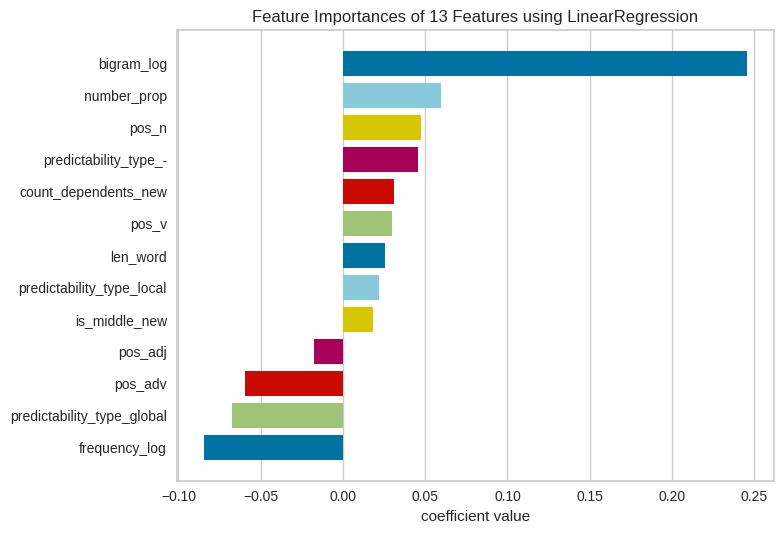

<Axes: title={'center': 'Feature Importances of 13 Features using LinearRegression'}, xlabel='coefficient value'>

In [ ]:
reg = LinearRegression()  # объект модели линейной регрессии

y = poses_encoded['correct_sem_prop'] # целевая переменная
X = poses_encoded.drop(columns = ['correct_guesses_prop', 'correct_pos_prop', 'correct_sem_prop']) # матрица всех признаков

# использзуем стандартизатор
sc = MinMaxScaler()

pandas_columns = X.columns
X = sc.fit_transform(X)

X = pd.DataFrame(X, columns=pandas_columns)

# наконец, делаем .fit()
reg.fit(X, y)

# добавим к датафрейму столбец prediction
X['prediction'] = reg.predict(X)

# метрики
mae = mean_absolute_error(y, X['prediction'])
mse = mean_squared_error(y, X['prediction'])

print('MAE: ', mae, '\nMSE: ', mse)

viz = FeatureImportances(reg, relative=False)
viz.fit(X, y)
viz.show()

MAE:  0.20465565730577367 
MSE:  0.06554895626373006


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


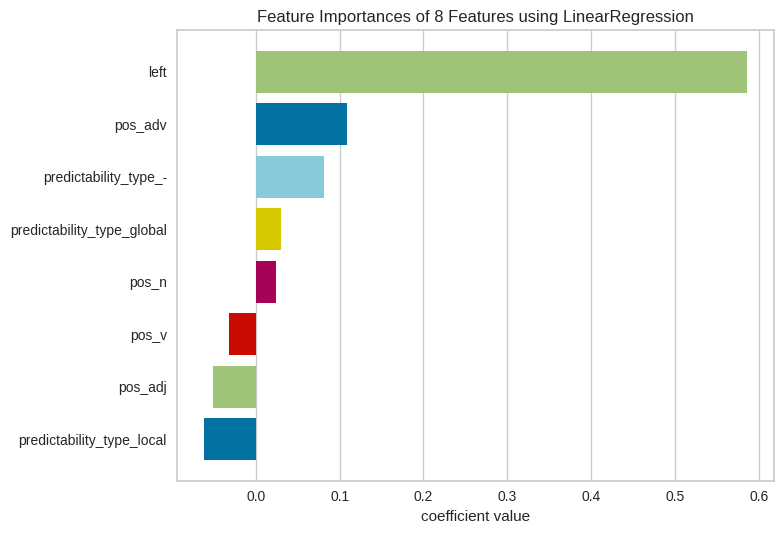

<Axes: title={'center': 'Feature Importances of 8 Features using LinearRegression'}, xlabel='coefficient value'>

In [ ]:
reg = LinearRegression()  # объект модели линейной регрессии

y = poses_encoded['correct_pos_prop'] # целевая переменная
X = poses_encoded.drop(columns = ['correct_pos_prop']) # матрица всех признаков

# использзуем стандартизатор
sc = MinMaxScaler()

pandas_columns = X.columns
X = sc.fit_transform(X)

X = pd.DataFrame(X, columns=pandas_columns)

# наконец, делаем .fit()
reg.fit(X, y)

# добавим к датафрейму столбец prediction
X['prediction'] = reg.predict(X)

# метрики
mae = mean_absolute_error(y, X['prediction'])
mse = mean_squared_error(y, X['prediction'])

print('MAE: ', mae, '\nMSE: ', mse)

viz = FeatureImportances(reg, relative=False)
viz.fit(X, y)
viz.show()

MAE:  0.18163672179349594 
MSE:  0.05387026679719203


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


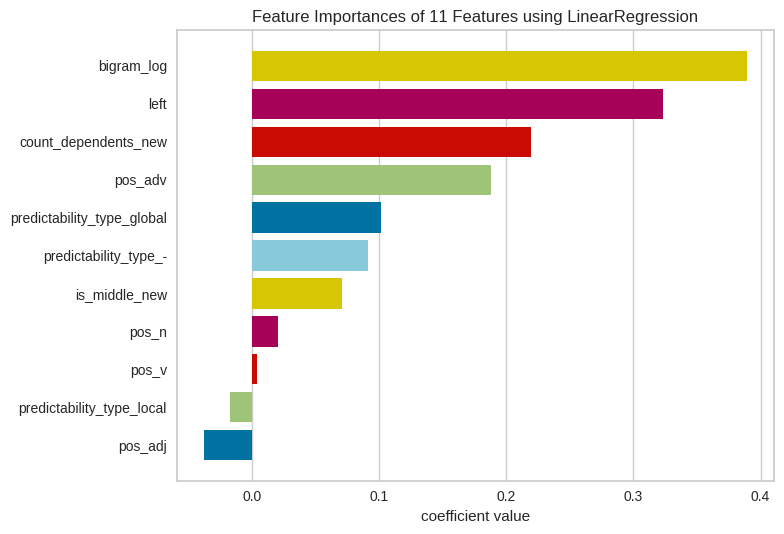

<Axes: title={'center': 'Feature Importances of 11 Features using LinearRegression'}, xlabel='coefficient value'>

In [ ]:
reg = LinearRegression()  # объект модели линейной регрессии

y = poses_encoded['correct_pos_prop'] # целевая переменная
X = poses_encoded.drop(columns = ['correct_pos_prop']) # матрица всех признаков

# использзуем стандартизатор
sc = MinMaxScaler()

pandas_columns = X.columns
X = sc.fit_transform(X)

X = pd.DataFrame(X, columns=pandas_columns)

# наконец, делаем .fit()
reg.fit(X, y)

# добавим к датафрейму столбец prediction
X['prediction'] = reg.predict(X)

# метрики
mae = mean_absolute_error(y, X['prediction'])
mse = mean_squared_error(y, X['prediction'])

print('MAE: ', mae, '\nMSE: ', mse)

viz = FeatureImportances(reg, relative=False)
viz.fit(X, y)
viz.show()

MAE:  0.187472548845313 
MSE:  0.058819504846797925


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


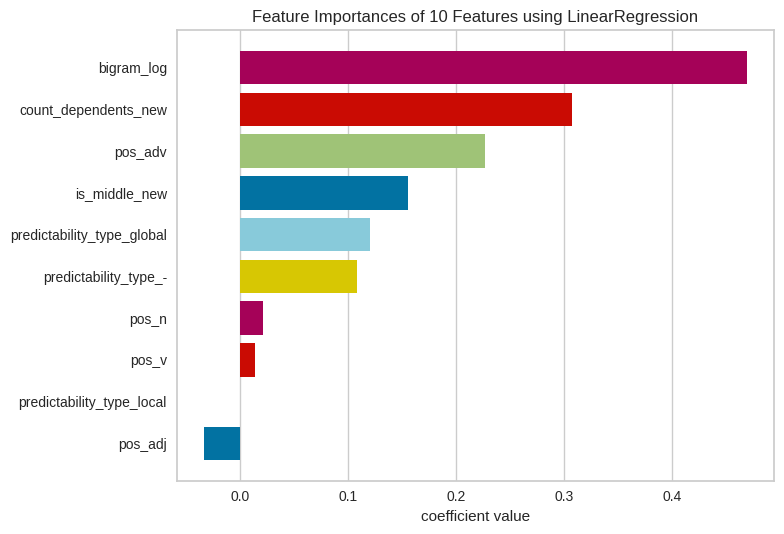

<Axes: title={'center': 'Feature Importances of 10 Features using LinearRegression'}, xlabel='coefficient value'>

In [ ]:
reg = LinearRegression()  # объект модели линейной регрессии

y = poses_encoded['correct_pos_prop'] # целевая переменная
X = poses_encoded.drop(columns = ['correct_pos_prop', 'left']) # матрица всех признаков

# использзуем стандартизатор
sc = MinMaxScaler()

pandas_columns = X.columns
X = sc.fit_transform(X)

X = pd.DataFrame(X, columns=pandas_columns)

# наконец, делаем .fit()
reg.fit(X, y)

# добавим к датафрейму столбец prediction
X['prediction'] = reg.predict(X)

# метрики
mae = mean_absolute_error(y, X['prediction'])
mse = mean_squared_error(y, X['prediction'])

print('MAE: ', mae, '\nMSE: ', mse)

viz = FeatureImportances(reg, relative=False)
viz.fit(X, y)
viz.show()